## Bank Customer Segementation Using Unsupervised Learning

Dataset taken from - https://www.kaggle.com/arjunbhasin2013/ccdata?select=CC+GENERAL.csv


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\kedar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kedar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\kedar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Reading the dataset

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Checking for missing values

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Imputing the missing values in MINIMUM_PAYMENTS with the mean value

In [1]:
df.loc[(df['MINIMUM_PAYMENTS'].isna() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

NameError: name 'df' is not defined

Imputing the missing values in CREDIT_LIMIT with the median value

In [7]:
df.loc[(df['CREDIT_LIMIT'].isna() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].median()

We delete column customer ID since it won't contribute in modelling

In [8]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [9]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [10]:
len(df.columns)

17

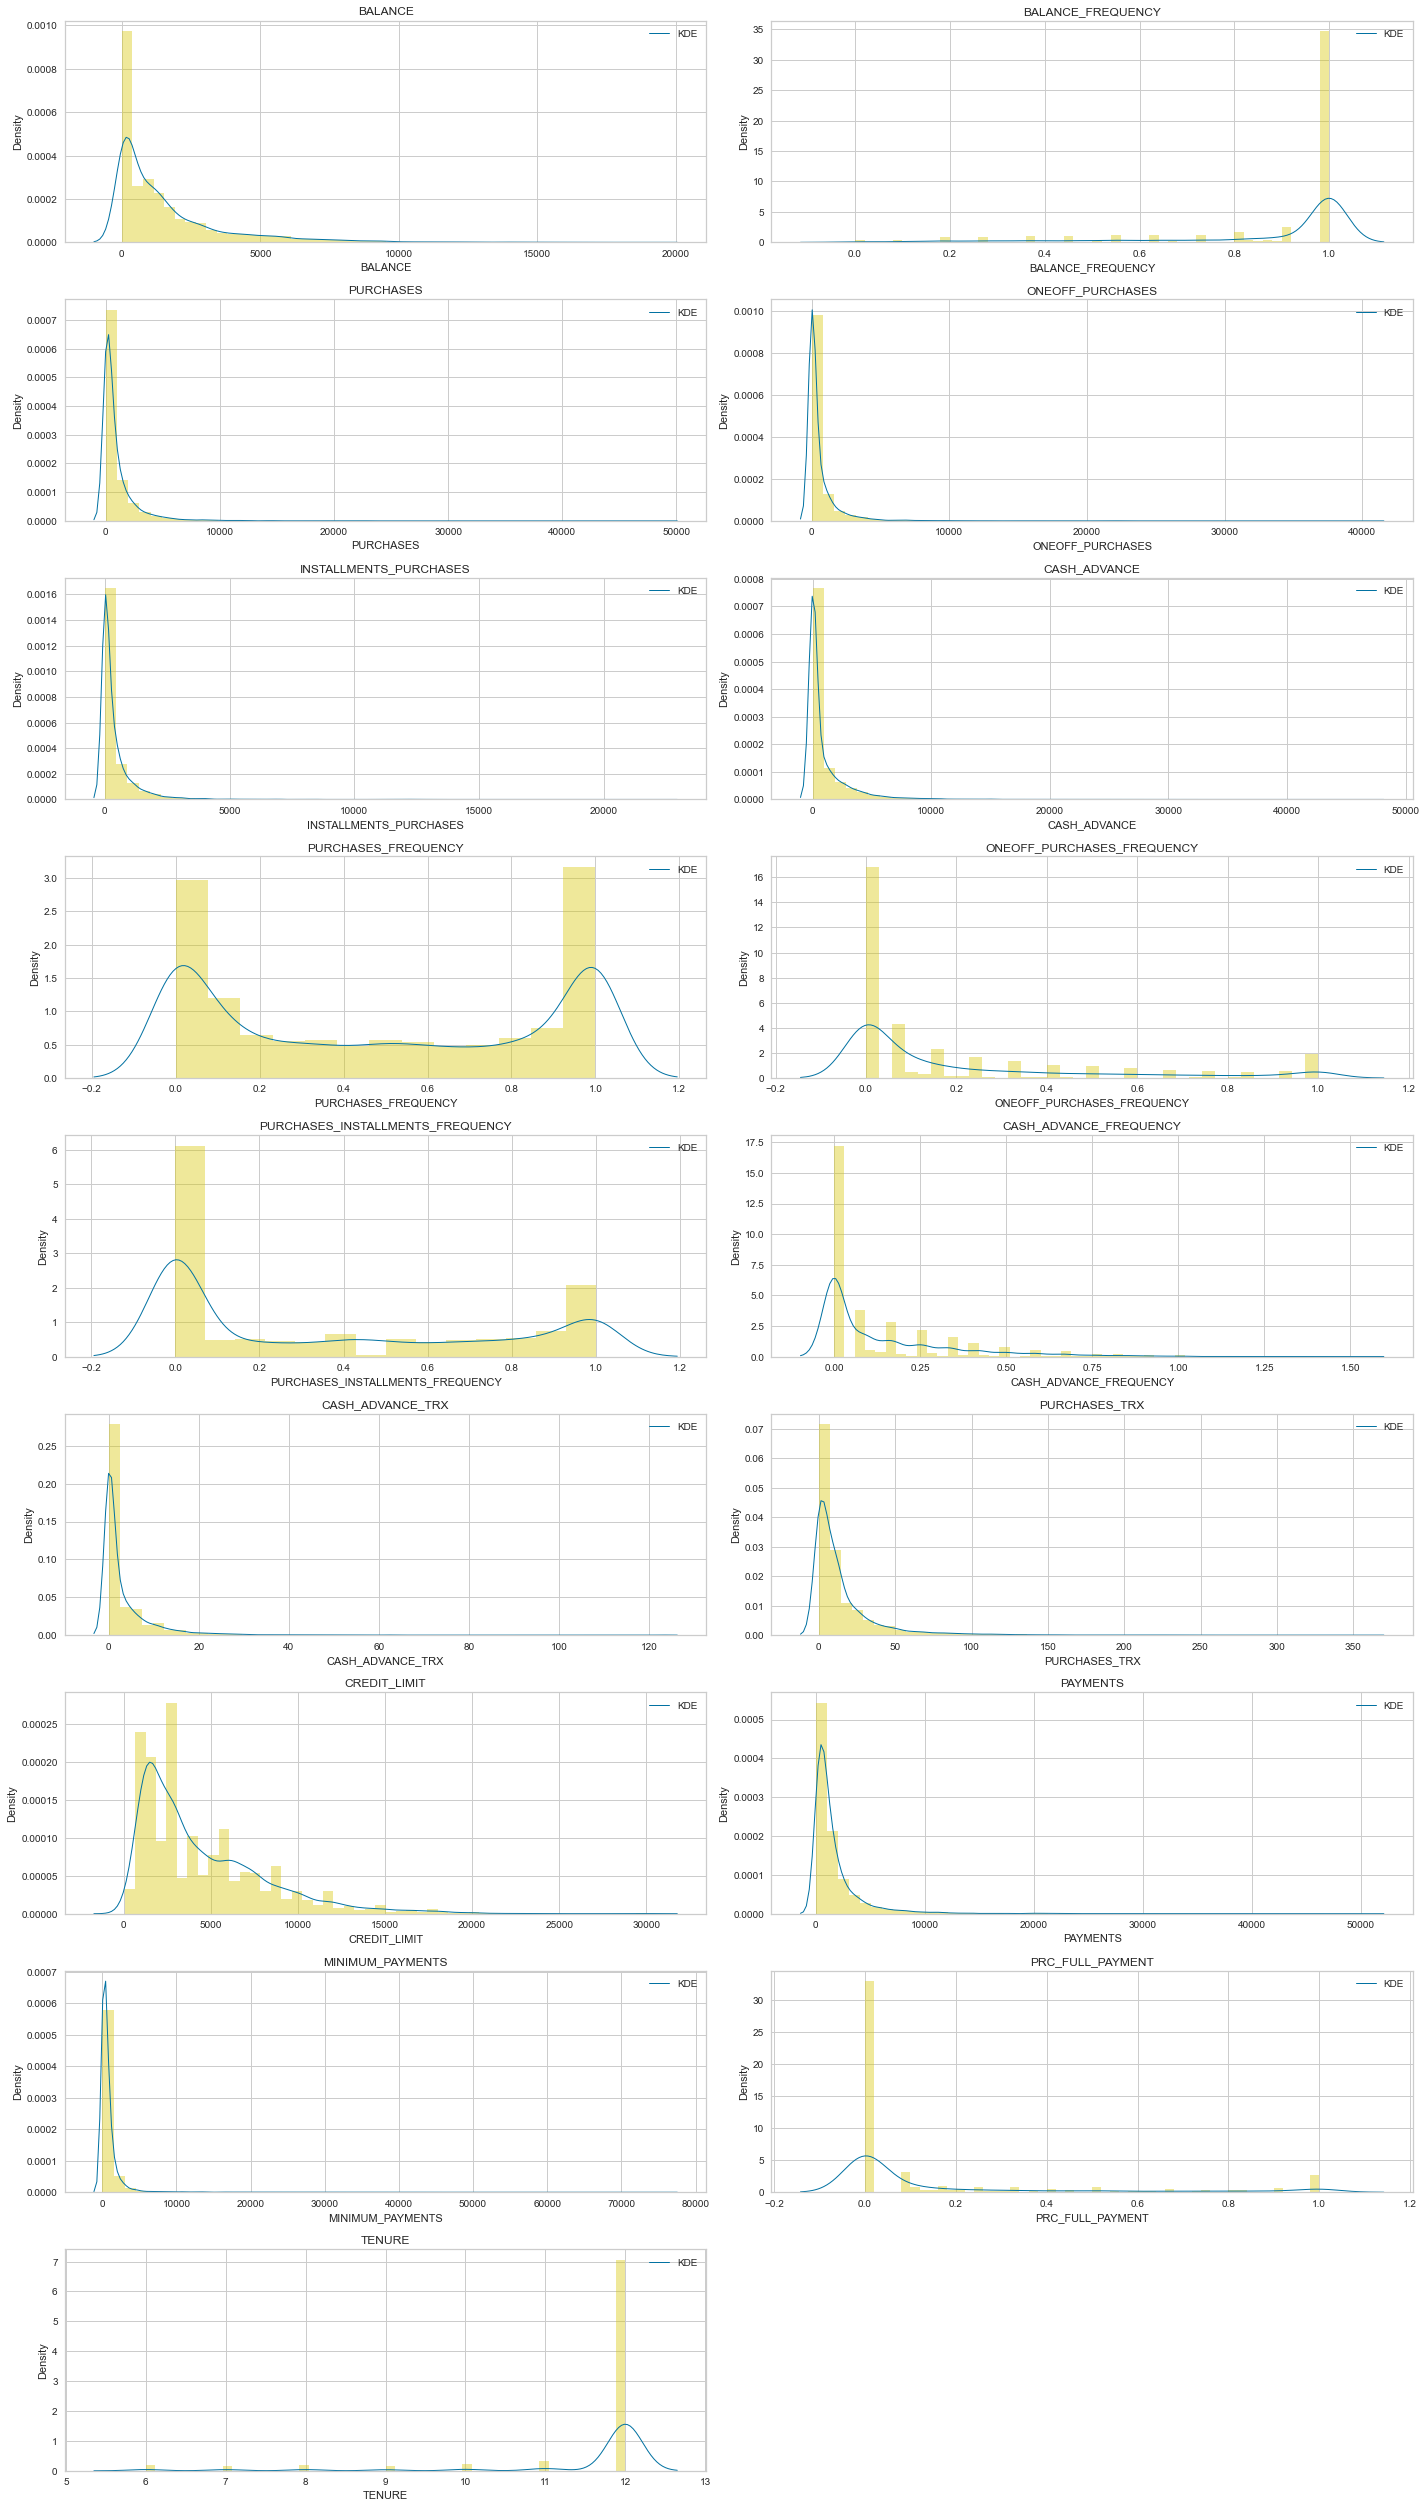

In [11]:
# Plotting a distplot
plt.figure(figsize=(20, 35))
for i in range(len(df.columns)):
    plt.subplot(9, 2, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})
    plt.title(df.columns[i])
    plt.legend()

plt.tight_layout()

Since the data is very skewed, we reduce skewness using square root method

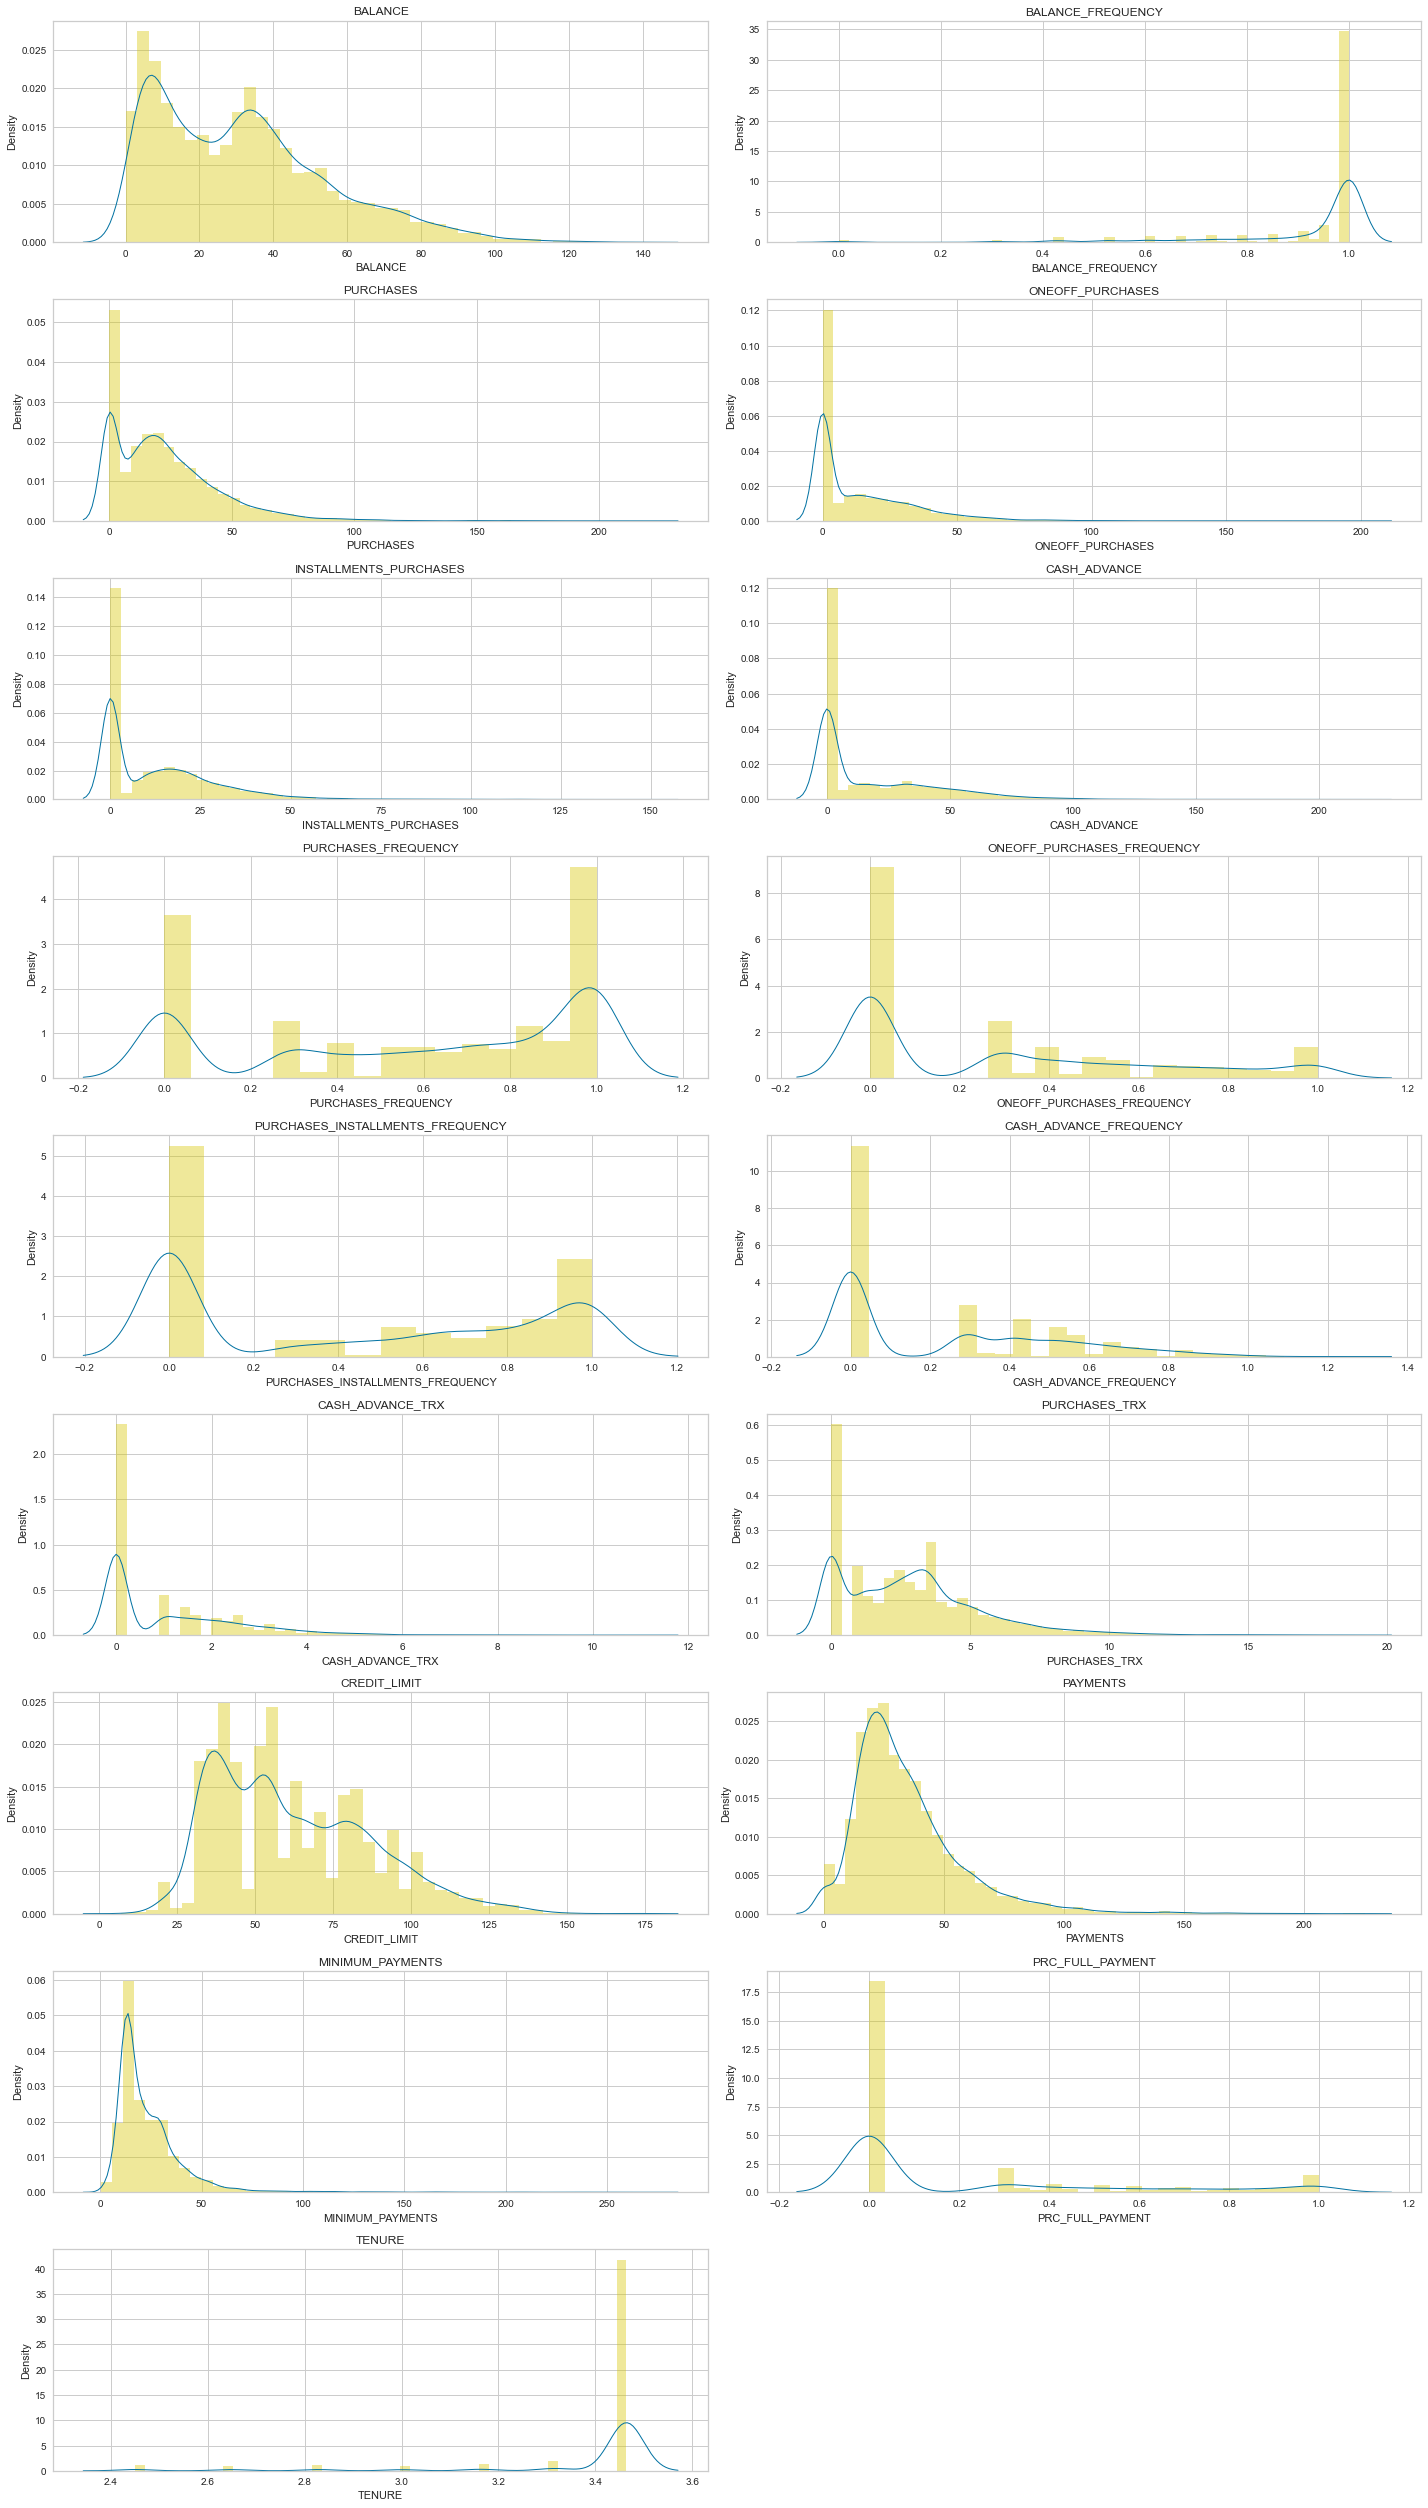

In [13]:
df2 = df.copy()

for col in df.columns:
    df2[col] = np.sqrt(df2[col])
# Plotting a distplot
plt.figure(figsize=(20, 35))
for i in range(len(df2.columns)):
    plt.subplot(9, 2, i+1)
    sns.distplot(df2[df2.columns[i]], kde_kws={"color": "b", "lw": 1, "label": "KDE"}, hist_kws={"color": "y"})
    plt.title(df2.columns[i])

plt.tight_layout()

Finding correlations in our dataset

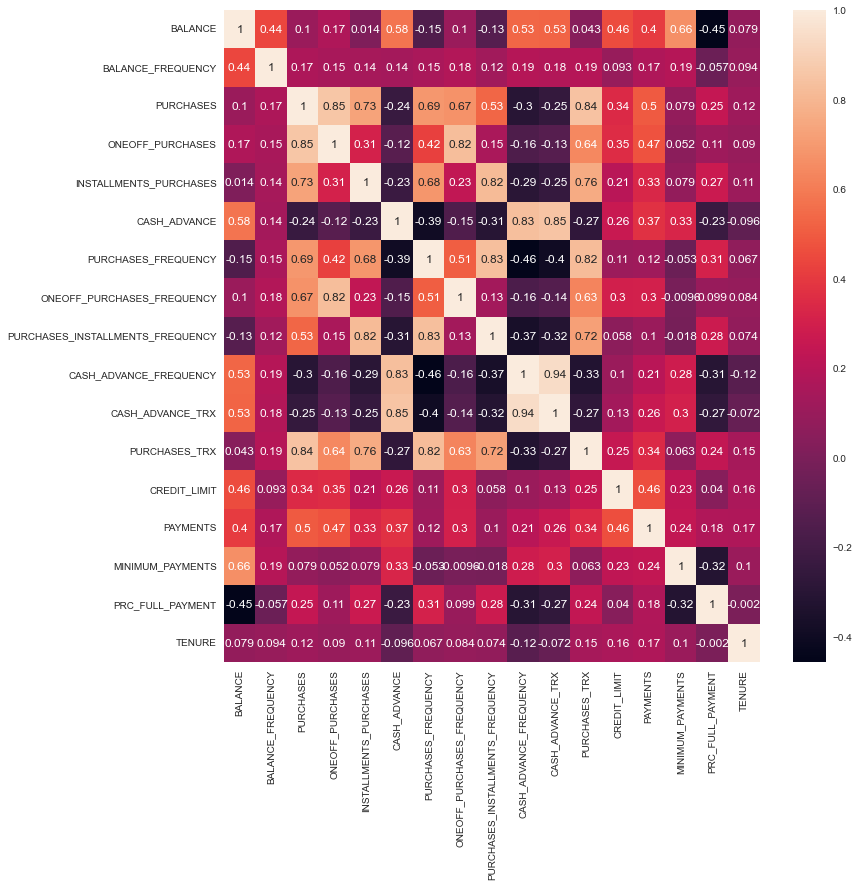

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), annot=True)
plt.show()

### Scale the data using Standard Scaler

In [15]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

In [16]:
df_scaled.shape

(8950, 17)

In [17]:
df_scaled

array([[-1.0780545 , -0.09712559, -0.59690132, ..., -0.66790184,
        -0.63618182,  0.35348056],
       [ 1.05361908,  0.19053935, -1.0423371 , ...,  0.52254404,
         0.78887411,  0.35348056],
       [ 0.77167992,  0.46414608,  0.22574803, ...,  0.08464159,
        -0.63618182,  0.35348056],
       ...,
       [-1.14422589, -0.04811222, -0.49431949, ..., -0.82330785,
         0.87531901, -4.27612743],
       [-1.19386072, -0.04811222, -1.0423371 , ..., -0.91494252,
         0.87531901, -4.27612743],
       [-0.52978249, -0.61472285,  0.46555636, ..., -0.8052387 ,
        -0.63618182, -4.27612743]])

### Perform PCA for dimensionality reduction 

In [18]:
pca = PCA(n_components=2, random_state=12)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = principal_components, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.885217,-2.482969
1,-3.000240,2.015256
2,1.191773,0.385186
3,-0.794760,0.218509
4,-1.265122,-1.593251


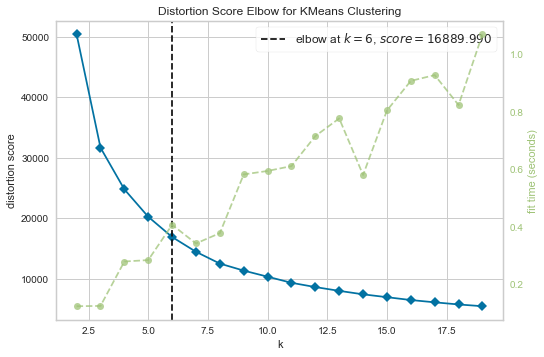

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,20))

distortion_visualizer.fit(pca_df)       
distortion_visualizer.show()       

In [20]:
kmeans = KMeans(n_clusters=distortion_visualizer.elbow_value_, random_state=12)
kmeans.fit(pca_df)
labels=kmeans.labels_

In [21]:
clusters=pd.concat([df, pd.DataFrame({'Cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


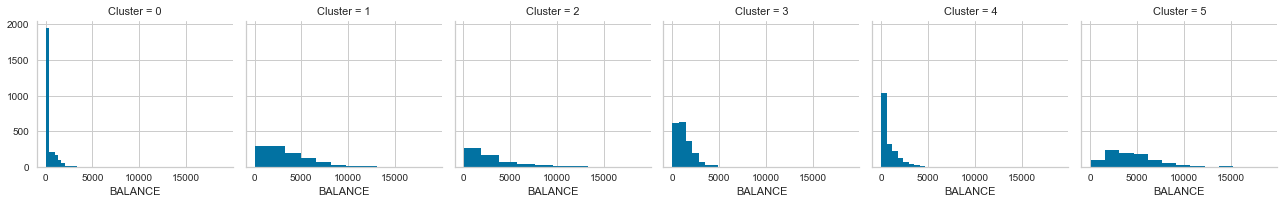

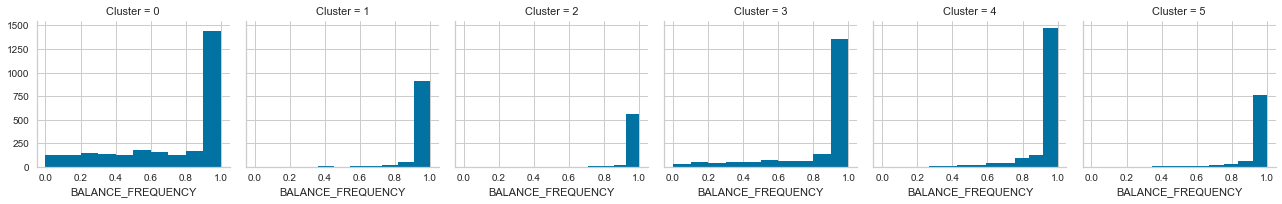

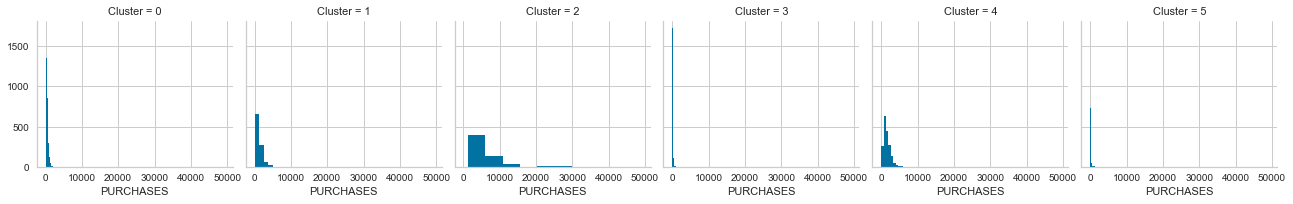

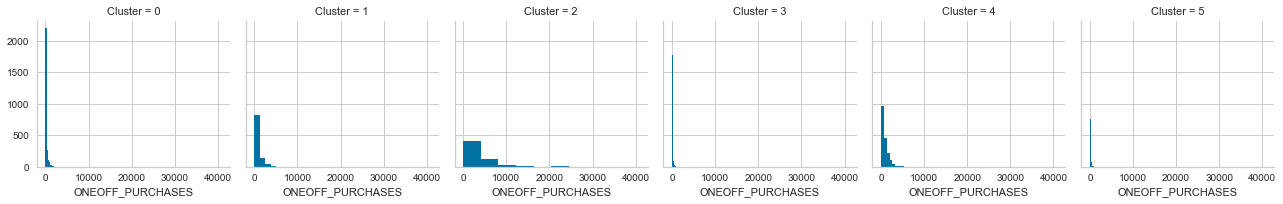

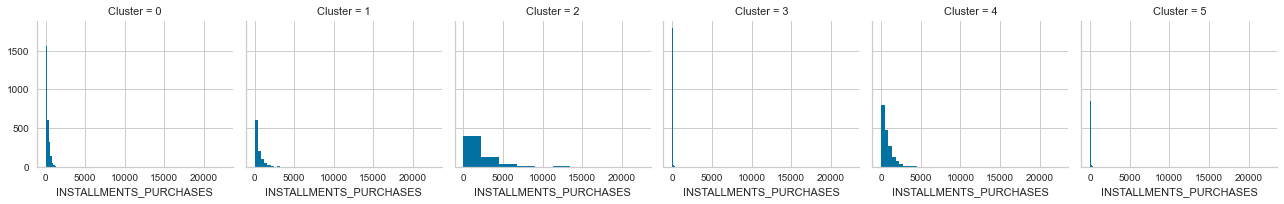

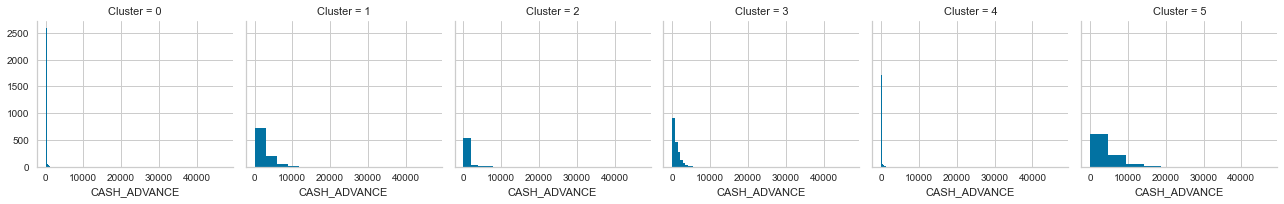

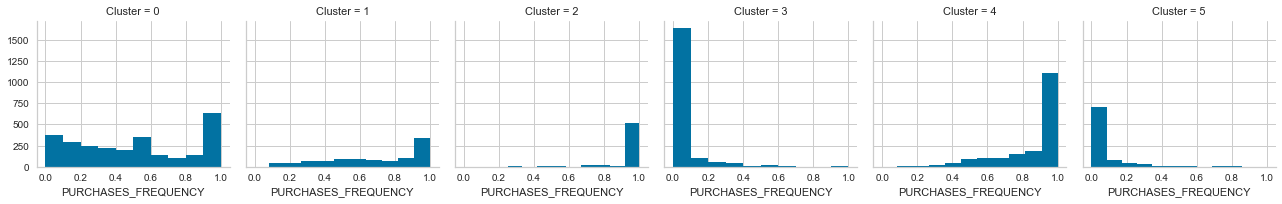

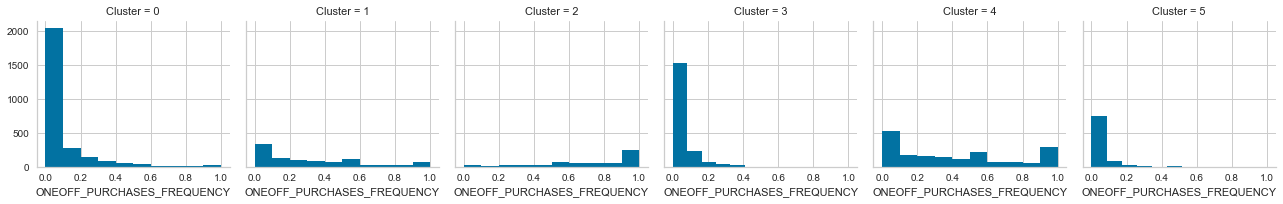

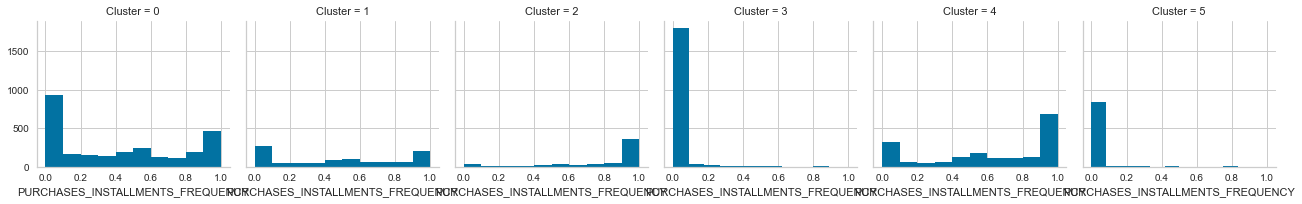

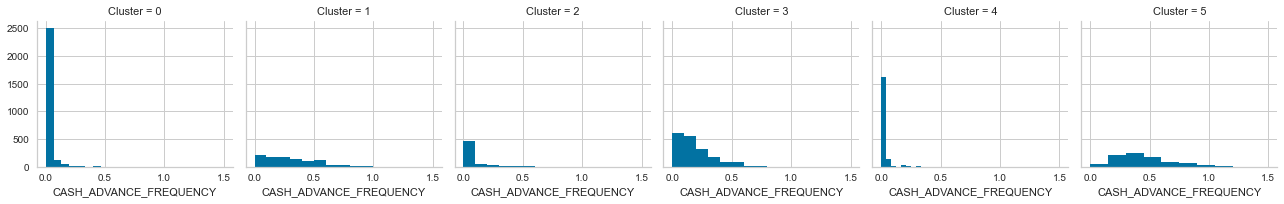

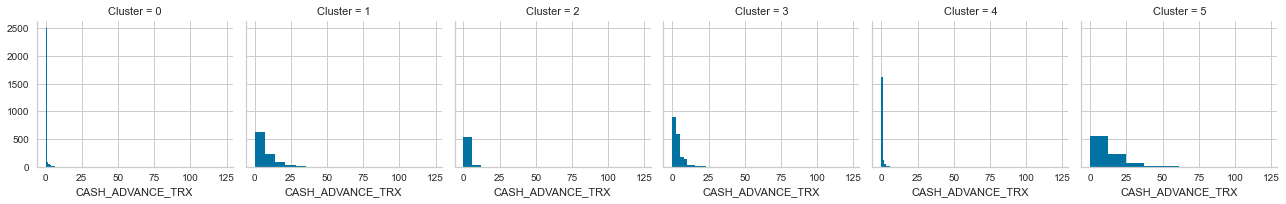

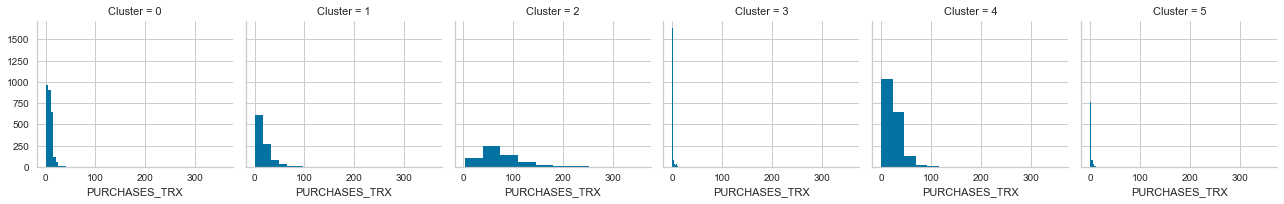

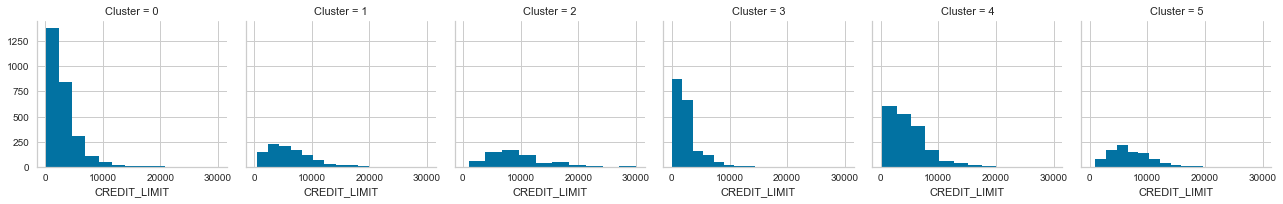

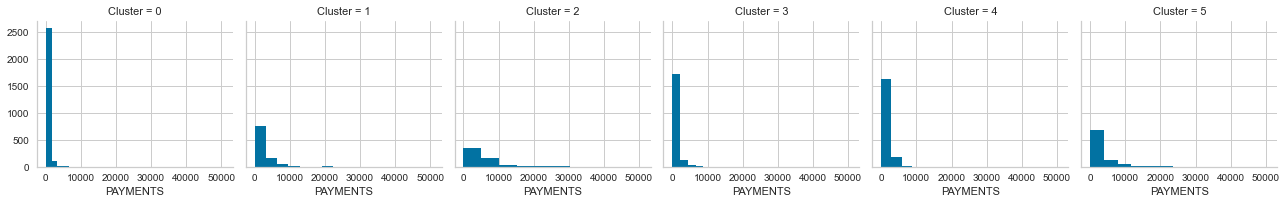

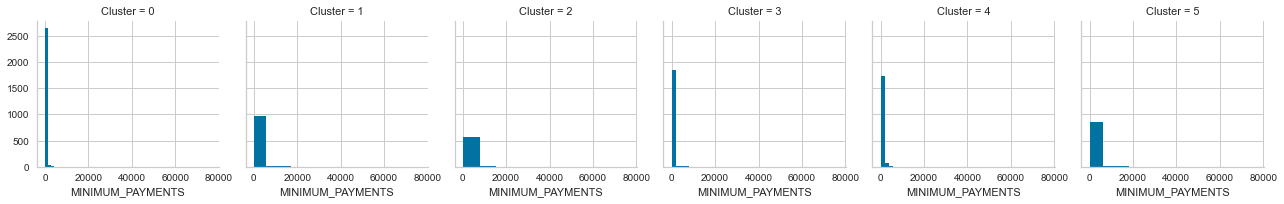

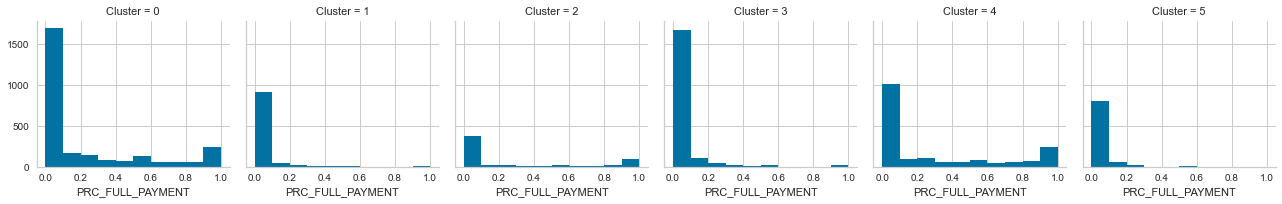

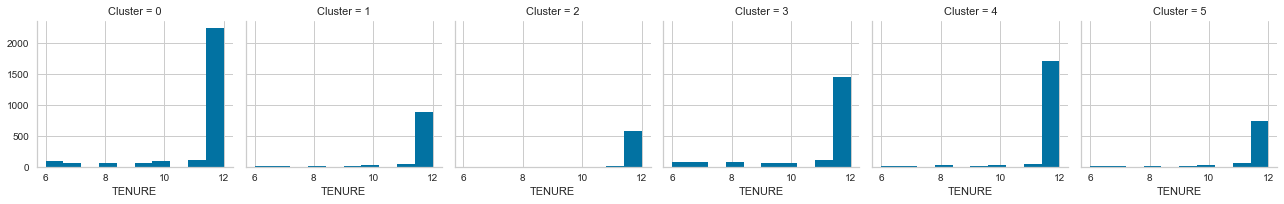

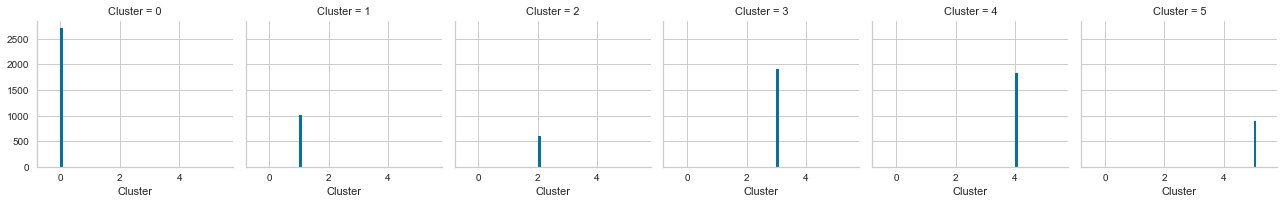

In [22]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='Cluster')
    grid.map(plt.hist, c)

In [23]:
clusters2= pd.concat([df2, pd.DataFrame({'Cluster':labels})], axis=1)

### Visualizing the clusters after KMeans Clustering

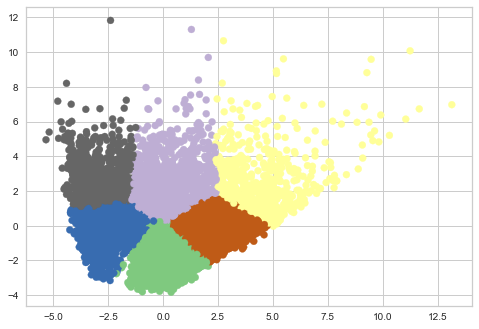

In [24]:
pca_clusters=pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis=1)
plt.scatter(pca_clusters['pca1'], pca_clusters['pca2'], c = labels, cmap =plt.cm.Accent)
plt.show() 

### Evaluating our model

In [25]:
print(f'Davies-Bouldin index = {davies_bouldin_score(pca_df, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_df, labels)}')

Davies-Bouldin index = 0.8339639333593573
Silhouette Score = 0.38007775155199924


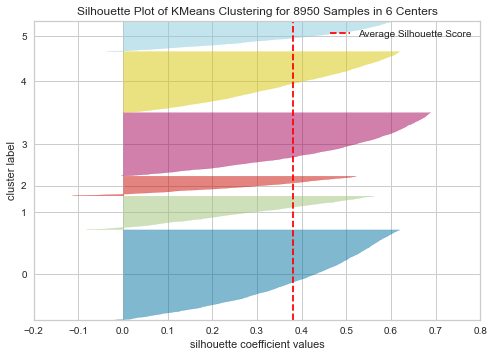

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})], axis=1)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_df.drop(['Cluster'],axis=1))
visualizer.show()

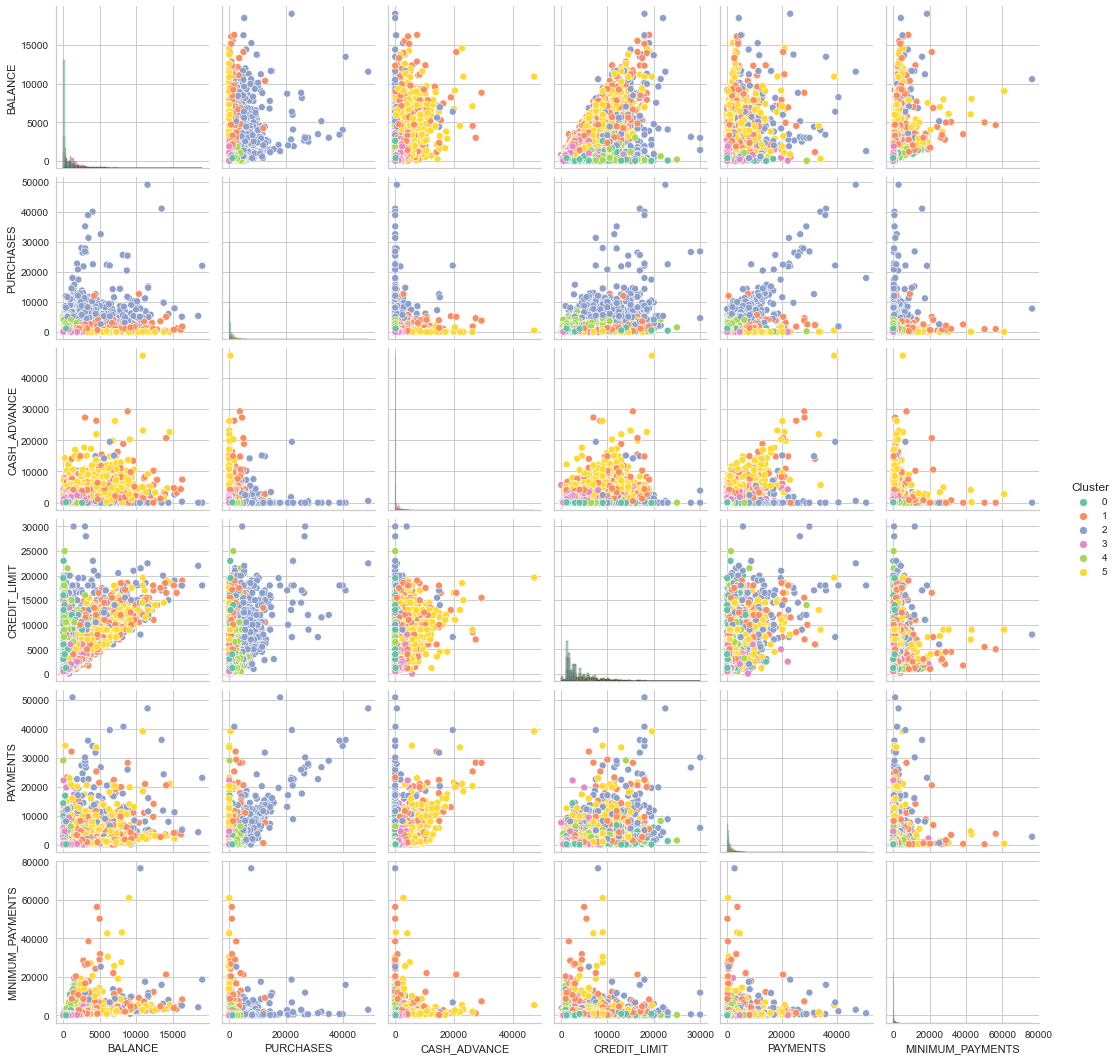

In [27]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", 'Cluster']
sns.pairplot( clusters[ best_cols ], hue="Cluster", palette='Set2', diag_kind="hist")

### Analysis of results and clusters using the mean values in the clusters

In [31]:
analysis_cluster = clusters.groupby('Cluster').apply(lambda x: x.mean()).T
analysis_cluster

Cluster,0,1,2,3,4,5
BALANCE,341.095511,3463.723183,3137.557830,1224.550296,822.866190,4352.093136
BALANCE_FREQUENCY,0.744938,0.974692,0.988904,0.863770,0.953921,0.967581
PURCHASES,369.297204,1210.295740,6324.877264,49.165157,1546.280327,92.106831
ONEOFF_PURCHASES,158.981508,744.328342,4136.129966,39.735708,831.481668,79.956898
INSTALLMENTS_PURCHASES,210.974691,465.989464,2189.760811,9.439942,714.881314,12.263785
CASH_ADVANCE,36.609999,2400.522243,604.307398,1013.644309,43.239231,4339.314443
PURCHASES_FREQUENCY,0.516643,0.691766,0.958517,0.049076,0.854498,0.066813
ONEOFF_PURCHASES_FREQUENCY,0.089087,0.315027,0.725077,0.027674,0.399454,0.042594
PURCHASES_INSTALLMENTS_FREQUENCY,0.408088,0.470175,0.812442,0.019367,0.622415,0.022037
CASH_ADVANCE_FREQUENCY,0.010798,0.309322,0.071901,0.206690,0.014995,0.453177


In [34]:
clusters['Cluster'].value_counts()

0    2718
3    1906
4    1834
1    1007
5     893
2     592
Name: Cluster, dtype: int64

### Inference from the clusters

- Cluster 0: Smallest Spenders and Lowest Credit Limit - this is the group with the lowest credit limit but they don't appear to buy much. Unfortunately this appears to be the largest group of customers.

- Cluster 1: Medium Spenders with third highest Payments - the second highest Purchases group (after the Big Spenders).

- Cluster 2: Big Spenders with large Payments - they make expensive purchases and have a credit limit that is between average and high. This is only a small group of customers.

- Cluster 3: Cash Advances with Small Payments - this group likes taking cash advances, but make only small payments.

- Cluster 4: Small Spenders and Low Credit Limit - they have the smallest Balances after the Smallest Spenders, their Credit Limit is in the bottom 3 groups

- Cluster 5: Cash Advances with large Payments but Highest Credit Limit and Frugal - this group takes the most cash advances. They make large payments, but this appears to be a small group of customers. this group doesn't make a lot of purchases. It looks like the 3rd largest group of customers.